In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

import stumpy

In [3]:
steam_df = pd.read_csv("/home/andjela/projects/stumpy-time-series/steamgen.csv")
steam_df.head()

,drum pressure,excess oxygen,water level,steam flow
0,320.08239,2.506774,0.032701,9.302970
1,321.71099,2.545908,0.284799,9.662621
2,320.91331,2.360562,0.203652,10.990955
3,325.00252,0.027054,0.326187,12.430107
4,326.65276,0.285649,0.753776,13.681666


In [14]:
y = steam_df['steam flow']
x = steam_df.index
print(x)


RangeIndex(start=0, stop=9600, step=1)
   drum pressure  excess oxygen  water level  steam flow
0      320.08239       2.506774     0.032701    9.302970
1      321.71099       2.545908     0.284799    9.662621
2      320.91331       2.360562     0.203652   10.990955
3      325.00252       0.027054     0.326187   12.430107
4      326.65276       0.285649     0.753776   13.681666
RangeIndex(start=0, stop=9600, step=1)


In [6]:
m = 640
matrix_profile = stumpy.stump(y, m)
matrix_profile



array([[16.235411477247823, 2242, -1, 2242],
       [16.08191866323061, 2243, -1, 2243],
       [15.909403017873426, 2245, -1, 2245],
       ...,
       [9.02293137221496, 877, 877, -1],
       [9.038259675949295, 878, 878, -1],
       [9.054692514421284, 879, 879, -1]], dtype=object)

In [16]:
matrix_profile_df = pd.DataFrame(matrix_profile, columns=['profile', 'profile index', 'left profile index', 'right profile index'])

matrix_profile_df.tail(10)

,profile,profile index,left profile index,right profile index
8951,8.937284,871,871,-1
8952,8.949783,872,872,-1
8953,8.96176,873,873,-1
8954,8.974059,873,873,-1
8955,8.986255,874,874,-1
8956,8.997375,875,875,-1
8957,9.009344,876,876,-1
8958,9.022931,877,877,-1
8959,9.03826,878,878,-1
8960,9.054693,879,879,-1



Find the Best Motif

The best motif is the one where the profile is the smallest (since the profile is the distance value)

Checking for the minimum will give us two matches, each of these should refer to each other which can be seen by looking at the profile index:


In [8]:
best_motif = matrix_profile_df[matrix_profile_df['profile'] == matrix_profile_df['profile'].min()]
best_motif

,profile,profile index,left profile index,right profile index
643,5.49162,8724,296,8724
8724,5.49162,643,643,8960


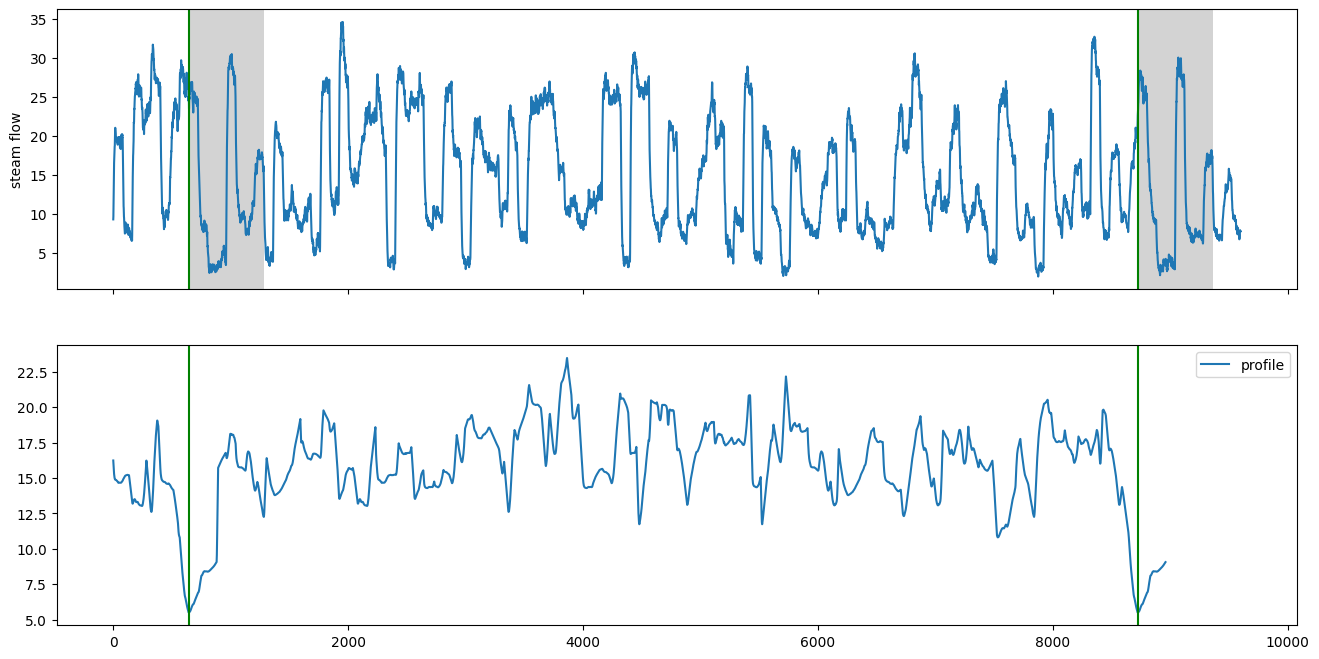

In [9]:
profile_df = matrix_profile_df[['profile']]

fig, ax = plt.subplots(2, figsize=(16,8), sharex=True)
g1 = sns.lineplot(y=y, x=x, ax=ax[0])
g2 = sns.lineplot(data=profile_df, ax=ax[1])

for idx in best_motif.index.to_list():
    g1.axvline(x=idx, color="green")
    g2.axvline(x=idx, color="green")
    rect = Rectangle((idx, 0), m, 40, facecolor="lightgrey")
    g1.add_patch(rect)

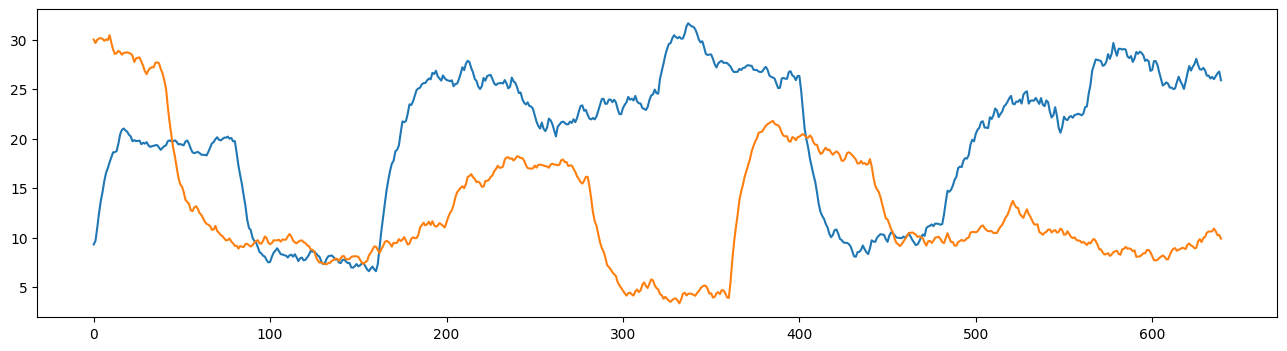

In [10]:
fig, ax = plt.subplots(figsize=(16,4))

for idx in [0, 1000]:
    plot_y = y.iloc[idx:(idx+m)].to_list()
    sns.lineplot(data=plot_y, ax=ax)


Find a Discord

Potential discords/anomalies can be located as data that's most different to any existing datapoints, this can be found by finding the max profile distance. We can find the anomaly segment by getting this value and plotting it below:


In [17]:
discord = matrix_profile_df[matrix_profile_df['profile'] == matrix_profile_df['profile'].max()]
discord

,profile,profile index,left profile index,right profile index
3864,23.476168,4755,1864,4755


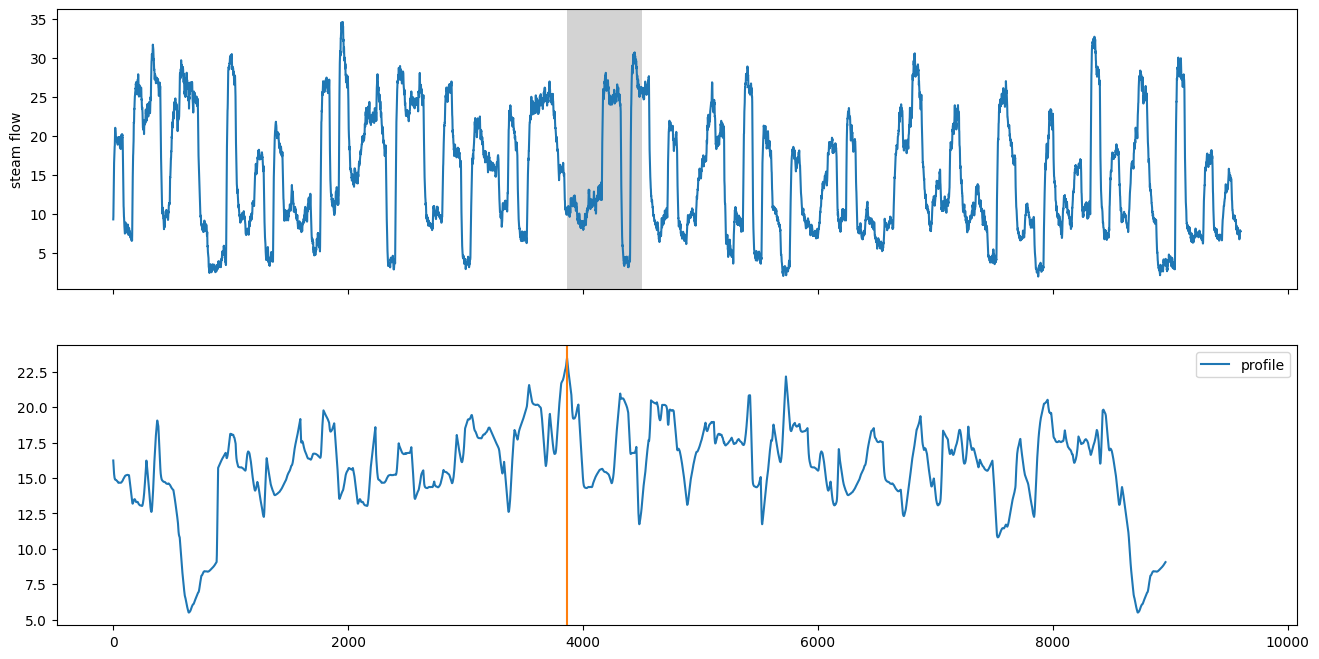

In [12]:


fig, ax = plt.subplots(2, figsize=(16,8), sharex=True)
g1 = sns.lineplot(y=y, x=x, ax=ax[0])
g2 = sns.lineplot(data=profile_df, ax=ax[1])


rect = Rectangle((discord.index[0], 0), m, 40, facecolor="lightgrey")
g1.add_patch(rect)
g2.axvline(x=[discord.index[0]], color='C1')

